# Objective

The objective of this notebook will be explore the various attributes of the dataset and see if we can make some basic observations and insights. The data fields show a number of features that are largely numerical in nature.

From the initial look of the data, a feature that would be nice to understand are the features leading to songs that people like. Another part of this notebook will attempt to create a model to predict whether or not a song will be liked based on the other features.

# Setup

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import json

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
df = pd.read_csv(r'C:\Users\nikes\Downloads\archive (4)/data.csv')
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [11]:
with open(r'C:\Users\nikes\Downloads\archive (4)\good.json', 'r') as f:
    data = json.load(f)
pd.DataFrame(data['audio_features'])

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.749,0.839,6,-4.847,1,0.2970,0.0867,0.000000,0.2040,0.804,172.068,audio_features,55mcupbf7cIsuCEVAuTJVk,spotify:track:55mcupbf7cIsuCEVAuTJVk,https://api.spotify.com/v1/tracks/55mcupbf7cIs...,https://api.spotify.com/v1/audio-analysis/55mc...,111000,4
1,0.573,0.581,10,-9.026,0,0.3390,0.7530,0.000001,0.1300,0.351,76.506,audio_features,57RtLWT7IpugV0yi5bsxJk,spotify:track:57RtLWT7IpugV0yi5bsxJk,https://api.spotify.com/v1/tracks/57RtLWT7Ipug...,https://api.spotify.com/v1/audio-analysis/57Rt...,169347,4
2,0.800,0.719,7,-6.262,1,0.2340,0.1090,0.000000,0.0580,0.815,143.975,audio_features,5VyfAfp2Yt3qaeuvq55ll3,spotify:track:5VyfAfp2Yt3qaeuvq55ll3,https://api.spotify.com/v1/tracks/5VyfAfp2Yt3q...,https://api.spotify.com/v1/audio-analysis/5Vyf...,230854,4
3,0.778,0.632,8,-6.415,1,0.1250,0.0404,0.000000,0.0912,0.827,140.951,audio_features,3eWHY75nDgte70hh5yf4UW,spotify:track:3eWHY75nDgte70hh5yf4UW,https://api.spotify.com/v1/tracks/3eWHY75nDgte...,https://api.spotify.com/v1/audio-analysis/3eWH...,224029,4
4,0.797,0.852,8,-5.202,1,0.2410,0.0555,0.000024,0.0536,0.480,136.035,audio_features,2UwrB6Ge6mPfUV8yGvAfX7,spotify:track:2UwrB6Ge6mPfUV8yGvAfX7,https://api.spotify.com/v1/tracks/2UwrB6Ge6mPf...,https://api.spotify.com/v1/audio-analysis/2Uwr...,102353,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.616,0.534,10,-10.264,0,0.4830,0.6390,0.000000,0.0844,0.556,170.054,audio_features,3dl4lXWlOxnGo94OqNtpdq,spotify:track:3dl4lXWlOxnGo94OqNtpdq,https://api.spotify.com/v1/tracks/3dl4lXWlOxnG...,https://api.spotify.com/v1/audio-analysis/3dl4...,146480,4
96,0.802,0.549,5,-8.600,0,0.0631,0.2680,0.004960,0.0984,0.498,138.984,audio_features,3DWDcsDoXRIFynCREIkibM,spotify:track:3DWDcsDoXRIFynCREIkibM,https://api.spotify.com/v1/tracks/3DWDcsDoXRIF...,https://api.spotify.com/v1/audio-analysis/3DWD...,184627,4
97,0.767,0.659,7,-4.541,1,0.0387,0.7850,0.000000,0.1120,0.631,90.056,audio_features,6fmtZEUoGwxPNvUgr0NJm1,spotify:track:6fmtZEUoGwxPNvUgr0NJm1,https://api.spotify.com/v1/tracks/6fmtZEUoGwxP...,https://api.spotify.com/v1/audio-analysis/6fmt...,186720,4
98,0.752,0.468,0,-9.966,1,0.3330,0.8050,0.000000,0.1360,0.716,82.795,audio_features,2edc1m7WXxdBA61WlxSInp,spotify:track:2edc1m7WXxdBA61WlxSInp,https://api.spotify.com/v1/tracks/2edc1m7WXxdB...,https://api.spotify.com/v1/audio-analysis/2edc...,179253,4


# Exploratory Data Analysis

C:\Users\nikes\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


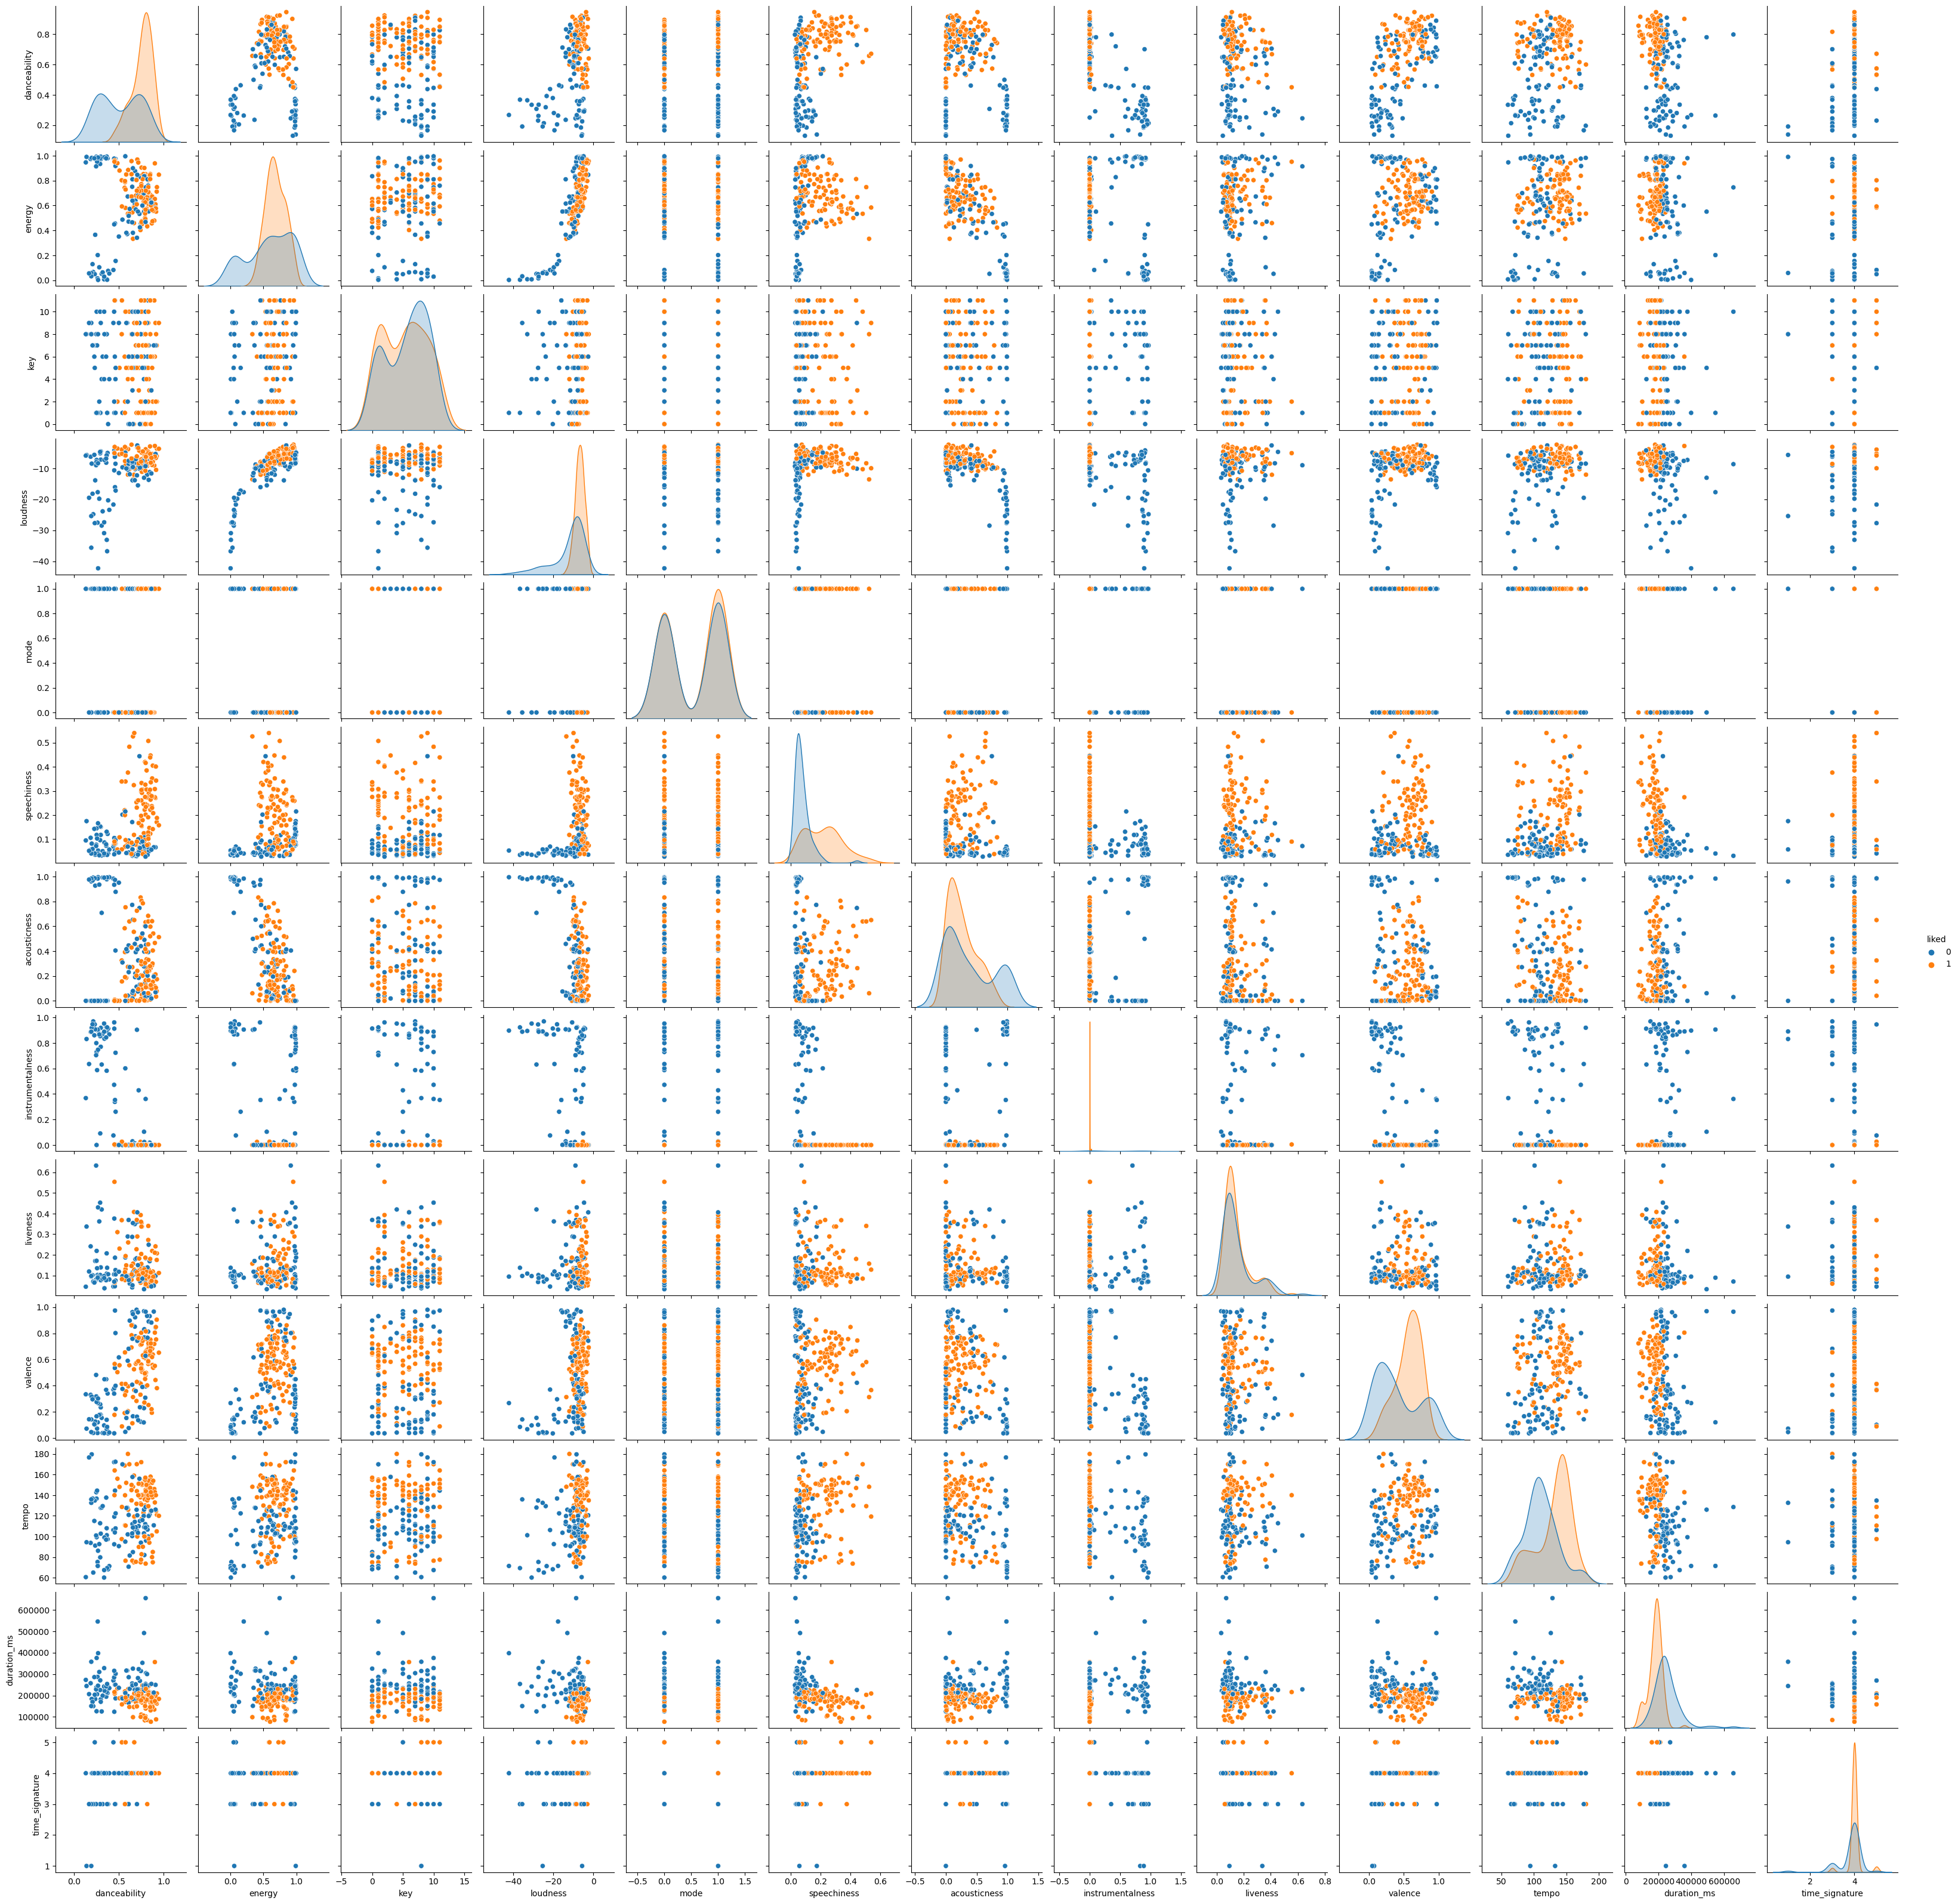

In [12]:
sns.pairplot(df,hue='liked')

## Observations
#### Danceability
* Data is right skewed
* Filtering for 'liked', the distribution of danceability has less variance and there is a distinct range where liked songs occupy

#### Energy
* Data is left skewed
* Filtering for 'liked', the distribution of energy has less variance and there is a distinct clusters where songs are very likely to be unliked

#### Key
* Data is categorical and relatively uniformly distributed

#### Loudness
* Data is left skewed
* Loudness correlated with Energy
* Filtering for 'liked', the distribution of loudness has less variance and there is a distinct range where liked songs occupy

#### Mode
* Data is binary
* No difference between 'liked' and 'unliked' distributions

#### Speechiness
* Data is right skewed
* Filtering for 'liked', the distribution of speechiness has less variance for unliked songs and there is a distinct range where songs are not liked

#### Acousticness
* Data is right skewed
* Filtering for 'liked', the distribution of acousticness follows similar shapes; however, beyond a certain range songs are not liked

#### Instrumentalness
* Majority of data is zero or near zero; however, if the zero records are ignored the data is left skewed
* Filtering for 'liked', the distribution of instrumentalness is extremely tight for songs that are liked

#### Liveness
* Data is right skewed
* Distribution between liked and unliked songs are similar from the dataset
* Clustering can be seen through the various features with respect to the 'liked' feature

#### Valence
* Data appears fairly uniform
* Splitting the data into 'liked' and 'unliked', there is a specific range of valence where songs are liked and unliked

#### Tempo
* Data appears to follow a normal distribution
* Liked songs are typically slightly higher tempo 

#### Duration
* Data appears to be a normal distribution with a low volume right tail
* Clear clustering seen on the duration metric between liked and unliked songs
* Durations of liked songs tend to be shorter

#### Time Signature
* Data is categorical with the large majority with a time signature of 4
* Tighter distribution with less variance for liked songs on the time signature

#### Liked
* Data is binary with either feature evenly distributed
* Data is likely this way due to the dataset provided being aggregated on liked and unliked songs

## Skew

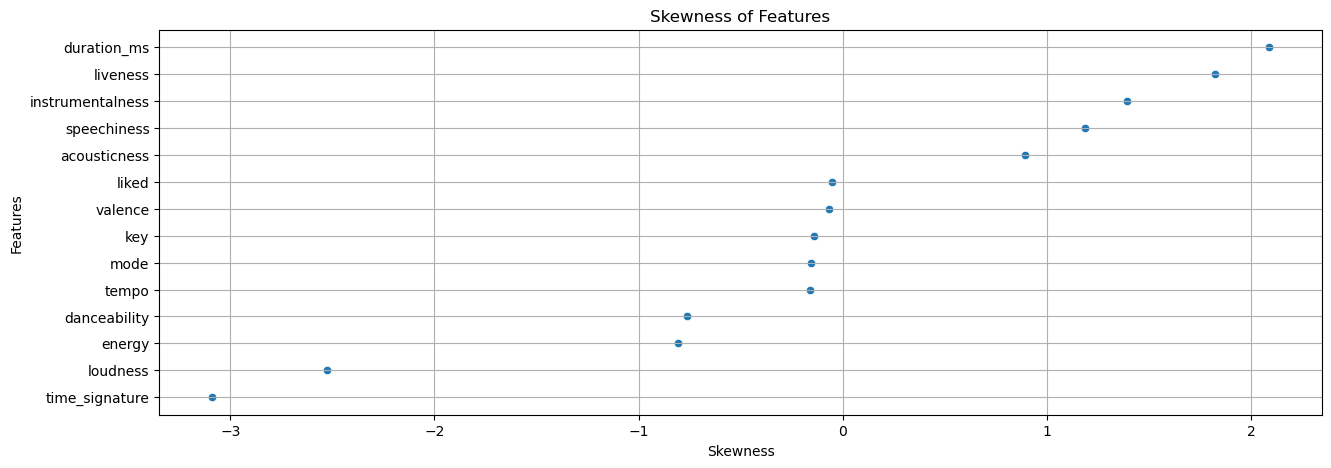

In [14]:
plt.figure(figsize=(15,5))
skewness = df.skew().sort_values(ascending=False)
sns.scatterplot(x=skewness.values, y=skewness.index)
plt.title('Skewness of Features')
plt.xlabel('Skewness')
plt.ylabel('Features')
plt.grid(True)
plt.show()


# Modeling

# Logistic Regression Modeling

In [15]:
# Importing the ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [16]:
X = df[[x for x in df.columns if x != 'liked']]
y = df['liked']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=143)

# Scaling the various features to deal with the skew
scaler = StandardScaler()
X_train_n = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_n = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

# Creating an instance of a logistic regression model
log = LogisticRegression()

# Fitting the model with the scaled data
log.fit(X_train_n, y_train)

# Create predictions
predictions = log.predict(X_test_n)

## Score

In [17]:
log.score(X_test_n,y_test)

0.826530612244898

## Confusion Matrix

In [18]:
metrics.confusion_matrix(y_test,predictions)

array([[40,  1],
       [16, 41]], dtype=int64)

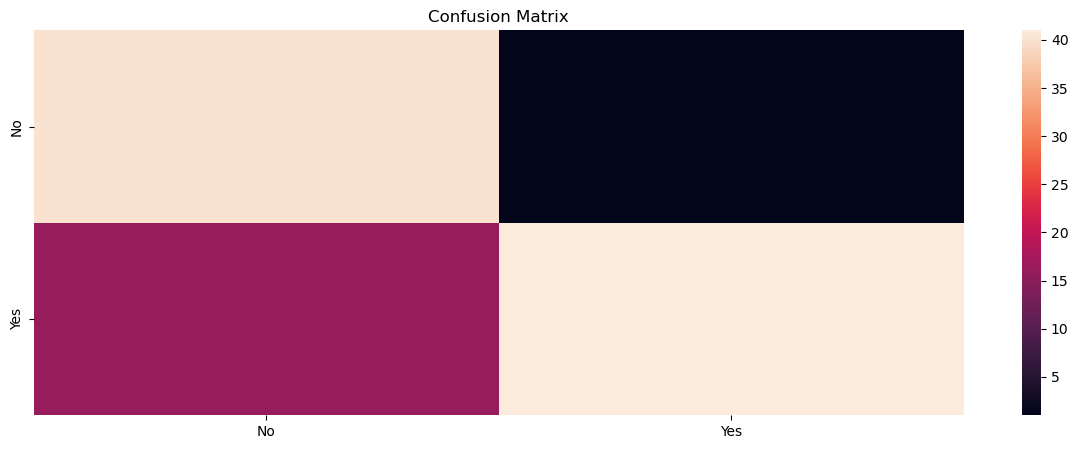

In [19]:
plt.figure(figsize=(15,5))
plt.title('Confusion Matrix')
plt.xlabel('Predicted',fontsize=15)
plt.ylabel('y_test')
sns.heatmap(metrics.confusion_matrix(y_test,predictions),xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.show()

## Changing the size of training / test sets

Changing the training/test set split to get a gauge the effectiveness of the model when changing the training dataset.

In [20]:
X = df[[x for x in df.columns if x != 'liked']]
y = df['liked']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=143)

# Scaling the various features to deal with the skew
scaler = StandardScaler()
X_train_n = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_n = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

# Creating an instance of a logistic regression model
log = LogisticRegression()

# Fitting the model with the scaled data
log.fit(X_train_n, y_train)

# Predict
predictions = log.predict(X_test_n)

# Score
score = log.score(X_test_n,y_test)
print(score)

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,predictions)
print(confusion_matrix)

0.8205128205128205
[[14  0]
 [ 7 18]]


# Conclusion

Initial pass of the logistic regression modeling provides a 82 - 85% score. Not terrible, but more work to come to see if we can't get that higher.  